In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
#from plotly import tools
#import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [3]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [6]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

# mostrar alguns exemplos de registros
data.head()

,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


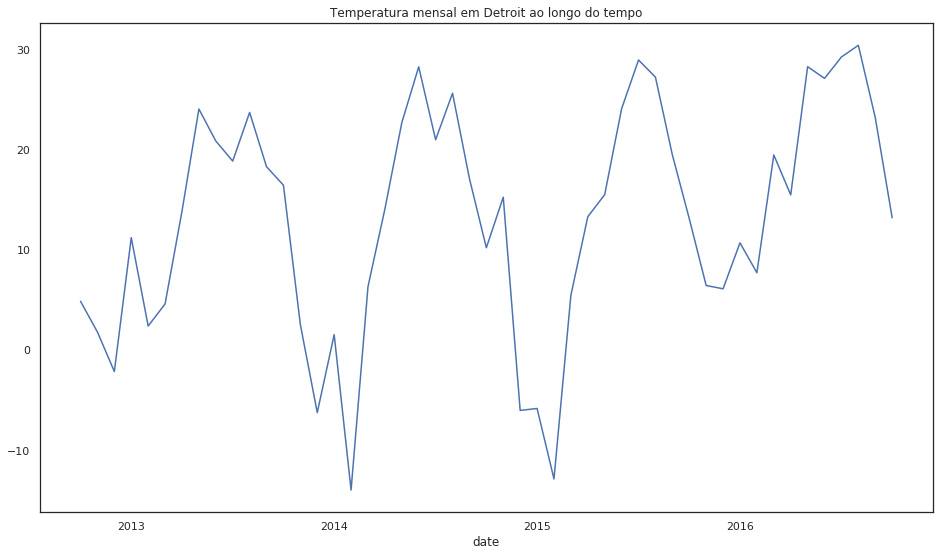

In [7]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.figure(figsize=(16, 9))
plt.title('Temperatura mensal em Detroit ao longo do tempo')
data['temperature'].asfreq('M').plot()
plt.show()

In [8]:
data.fillna(method='ffill', inplace=True)

In [9]:
# We downsample from hourly to 3 day frequency aggregated using mean
data.resample('D').mean().head(5)

,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


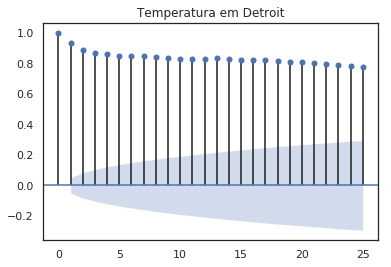

In [10]:
# Autocorrelation of humidity of San Diego
plot_acf(data['temperature'], lags=25, title="Temperatura em Detroit")
plt.show()

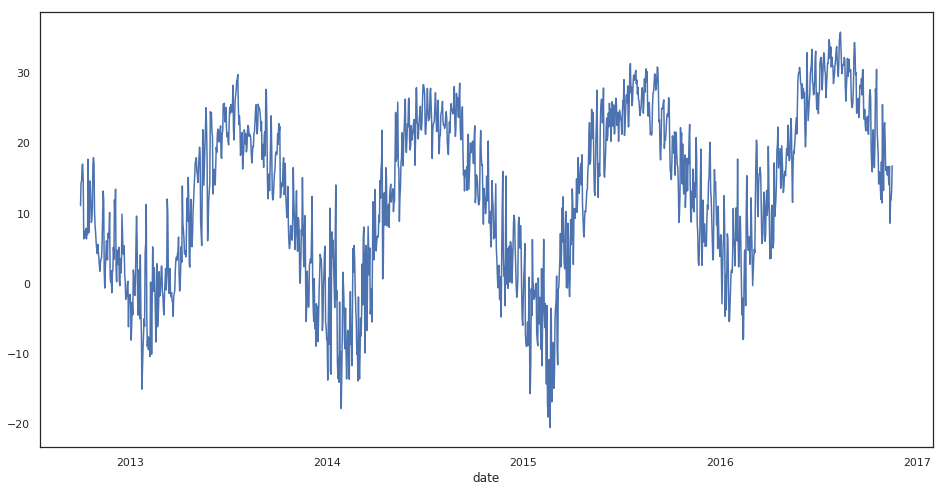

In [11]:
data['temperature'].plot(figsize=(16,8))

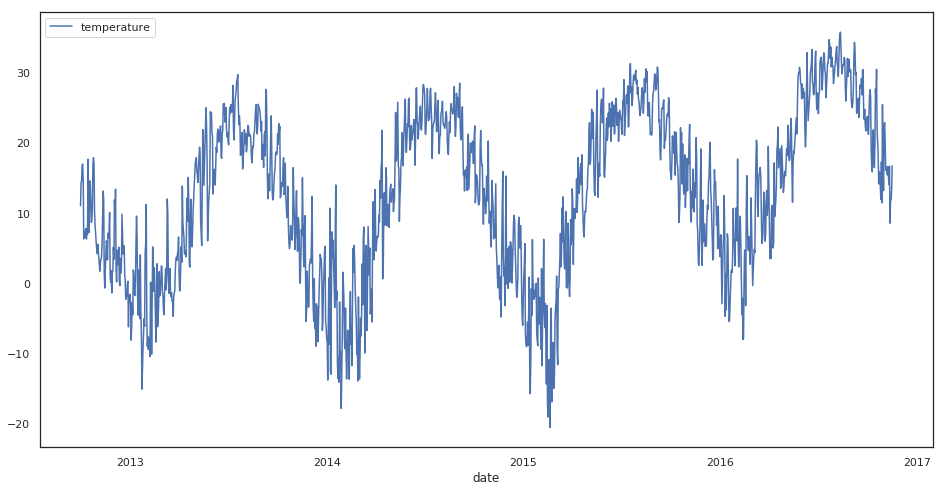

In [12]:
data.resample('D').mean().plot(figsize=(16,8))

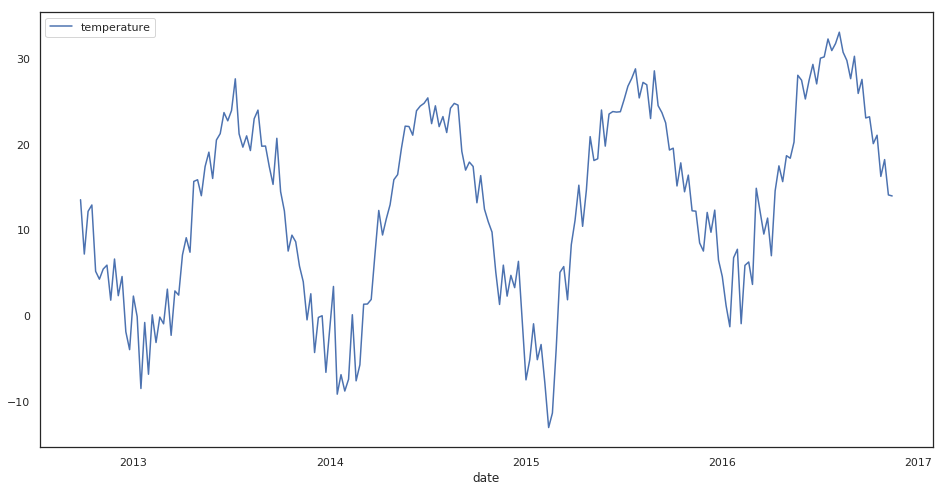

In [13]:
data.resample('7D').mean().plot(figsize=(16,8))

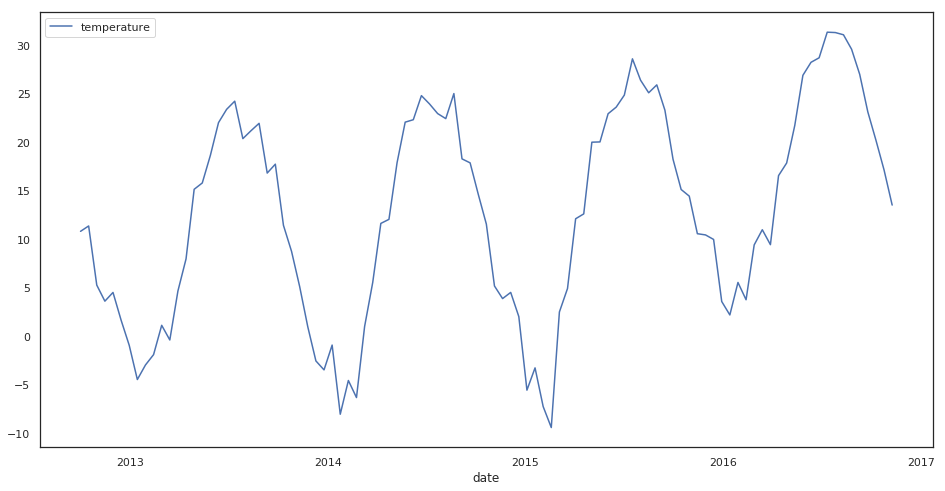

In [14]:
data.resample('15D').mean().plot(figsize=(16,8))

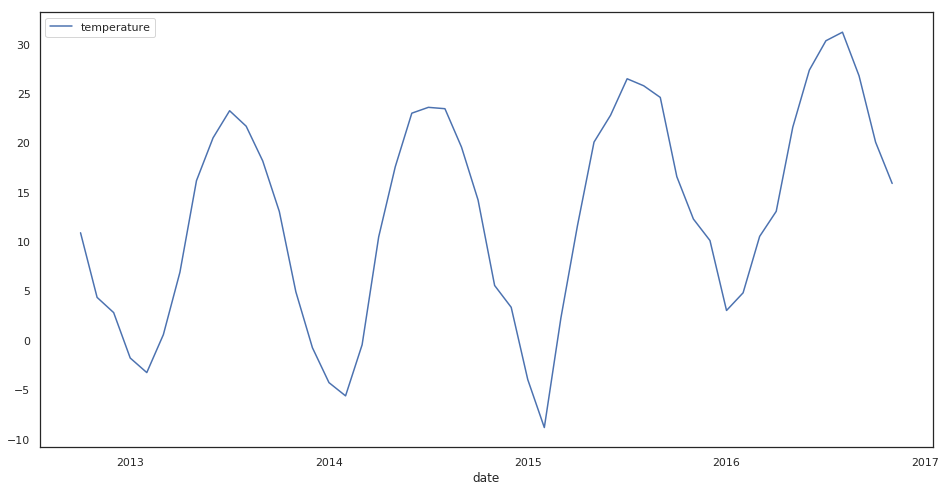

In [15]:
data.resample('M').mean().plot(figsize=(16,8))